<a href="https://colab.research.google.com/github/Malek-Ghorbel/ranking-semantics-Abstract-Argumentation/blob/main/6_Matt%26Toni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import matplotlib.pyplot as plt
import networkx as nx

In [87]:
def create_graph(nodes, edges):
  AF = nx.DiGraph()
  AF.add_nodes_from(nodes)
  AF.add_edges_from(edges)
  return AF

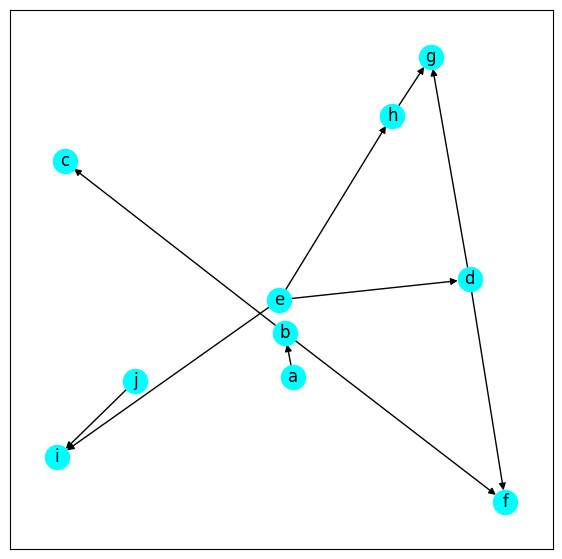

In [88]:
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
edges = [('a', 'b'), ('b' , 'c'), ('b', 'f'), ('d', 'f'), ('d', 'g'), ('e', 'h'), ('e', 'd'), ('e', 'i'),  ('j', 'i'), ('h', 'g')]
G = create_graph(nodes, edges)
plt.figure(figsize =(7, 7))
nx.draw_networkx(G, with_labels = True, node_color ='cyan')

In [94]:
# Calculate the weights of each node

weights = nx.pagerank(G)


# Calculate the strengths of each argument
    
def calculate_strengths(G, weights):
  strengths = {}
  for node in G.nodes():
    strengths[node] = 1 - max([max([G.edges[x, y].get('weight', weights[node]), weights[y]]) for x, y in G.in_edges(node)] + [0])
  return strengths 



In [91]:
# Assign ranks to each argument based on strength and value of zero-sum game
def zero_sum(G):
  s = calculate_strengths(G,weights)
  values = {}
  for x in G.nodes():
      value = 0
      for y in nodes:
          if (x, y) in edges:
              value += s[y]
          elif (y, x) in edges:
              value -= s[y]
      values[x] = value
  return values

In [92]:
# Define the Matt and Toni ranking 

def mt_ranking(G, values):
    ranking = sorted(G.nodes(), key=lambda x: values[x], reverse=True)
    return {arg: rank for rank, arg in enumerate(ranking)}

In [98]:
values = zero_sum(G)
mt = mt_ranking(G, values)

for arg, rank in mt.items():
    print(f"{arg} -> {rank}")

e -> 0
a -> 1
j -> 2
b -> 3
d -> 4
h -> 5
c -> 6
f -> 7
g -> 8
i -> 9
